![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicio 01. Métodos Numéricos Básicos

## A. Límite de Difracción para un Telescopio

Como es bien conocido, la habilidad para resolver detalles en una observación astronómica esta limitada (entre otros muchos factores) por la difrección de la luz en el telescopio. Para modelar este efecto,
se puede asumir que la luz de una estrella es emitida a partir de un punto localizado en el infinito.
Cuando esta radiación de longitud de onda λ pasa a través de la apertura circular de un telescopio
(con un radio unitario) y se enfoca en el plano focal, no se produce un solo punto luminoso, sino que
se registra un patrón circular de difracción que consiste de una región central luminosa rodeada de
una serie de anillos concéntricos. La intensidad de la luz en el patrón de difracción esta dada por la
función

\begin{equation}
    I(r) = \left( \frac{2J_1 (kr)}{kr} \right)^2,
\end{equation}

donde $r$ es la distancia en el plano focal medida desde el centro del patrón, $k = \frac{2\pi}{\lambda}$ y $J_1 (x)$ es una función de Bessel (ver documento adjunto con la deducción completa). 

Las funciones de Bessel de primera especie están definidas por la relación general

\begin{equation}
    J_m (x) = \frac{1}{\pi} \int_0^{\pi} \cos (m\tau - x \sin \tau ) d\tau,
\end{equation}

con $m$ un entero no-negativo y $x\geq 0$.

---

1. Escriba una función que calcule las funciones de Bessel de primera especie $J_m(x)$ utilizando la regla de Simpson con $1000$ puntos en el intervalo de integración.

2. Utilice esta función para graficar el comportamiento de las funciones de Bessel de orden $m=0,1,2$ para $0\leq x \leq 20$.

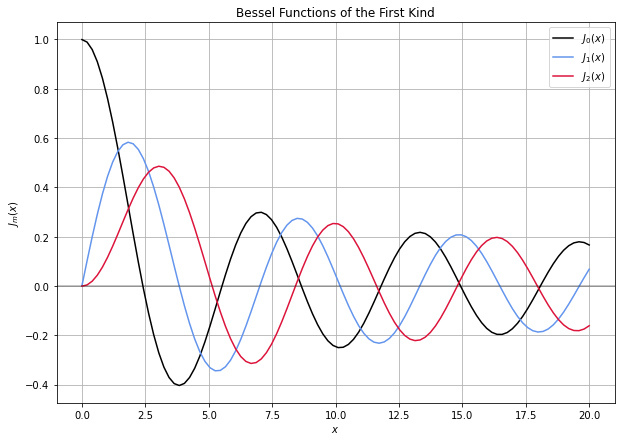

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Bessel(x, m=1):
    '''
    Returns de Bessel function of the first kind with 
    index m
    ------------------------------------------------------------
    Arguments
    m: order of the Bessel function. Non-negative integer
    x: Point to calculate the Besse function. x>=0
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    def f(th,x):
        '''Integrand in the Bessel function'''
        return np.cos(m*th -x*np.sin(th))
    
    # Number of points in the Simpson's Rule of integration
    n = 1000
    # Integration range and dth definition
    thRange = np.linspace(0,np.pi,n)
    dth = thRange[1] - thRange[0]
    # Integration Loop
    Integral = 0.
    for i in range(int((n-3)/2 +1)):
        Integral += (dth/3)*(f(thRange[2*i],x) + 4*f(thRange[2*i+1],x)+ f(thRange[2*i+2],x))
    return Integral/(np.pi)

# Plot of Bessel functions
xrange = np.linspace(0,20,100)
plt.figure(figsize=(10,7))
plt.plot(xrange, Bessel(xrange, m=0), color='black', label=r'$J_0(x)$')
plt.plot(xrange, Bessel(xrange, m=1), color='cornflowerblue',label=r'$J_1(x)$')
plt.plot(xrange, Bessel(xrange, m=2), color='crimson',label=r'$J_2(x)$')
plt.axhline(0, color='black', alpha=0.3)
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$J_m(x)$')
plt.title('Bessel Functions of the First Kind')
plt.legend()
plt.show()

---
3. Utilice esta función para obtener un gráfico de densidad para la intensidad del patrón de difracción circular para una fuente puntual con $\lambda = 500 \text{ nm}$ en la región $0 \leq r \leq 1 \text{ } \mu\text{m}$. Ver documentación de la función [matplotlib.pyplot.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

4. Localice los valores de $r$ en los cuales se ubican los 4 primeros máximos del patrón de intensidad.

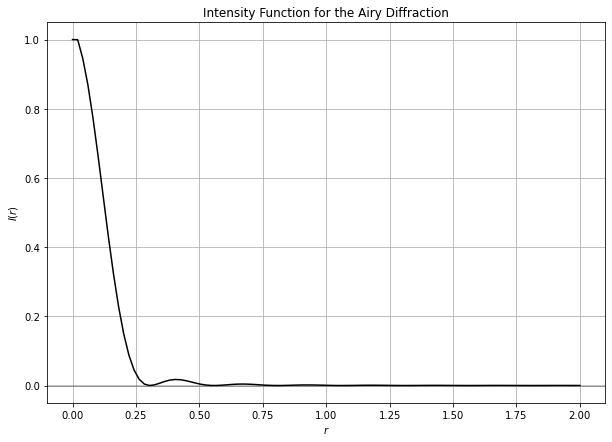

In [2]:
def Intensity(r, lmbda=500):
    '''
    Intensity function for the Airy diffraction pattern.
    ------------------------------------------------------------
    Arguments
    r: distance form the center of the pattern measured in
       micro-meters
    lmbda: Wavelenght of the incident radiation measured
           in nano-meters
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    r *= 1e3 # micrometers to nanometers
    k = 2*np.pi/lmbda
    
    if k*r == 0.:
        return 1
    else:
        return (2*Bessel(k*r,1)/(k*r))**2


# Initial Data
lmbda = 500 #[nanometers]
r_max = 2 #[micrometers] We use a greater value to obtain a good 2D pattern later

# Intensity pattern detemrination
rrange = np.linspace(0,r_max,100)
intensity_pattern = np.zeros_like(rrange)
for i in range(len(rrange)):
    intensity_pattern[i] = Intensity(rrange[i])

# Plot the obtained pattern (1D)
plt.figure(figsize=(10,7))
plt.plot(rrange, intensity_pattern, color='black')
plt.axhline(0, color='black', alpha=0.3)
plt.grid()
plt.xlabel(r'$r$')
plt.ylabel(r'$I(r)$')
plt.title('Intensity Function for the Airy Diffraction')
plt.show()

Ahora se creará el patrón de difracción den forma 2-Dimensional.

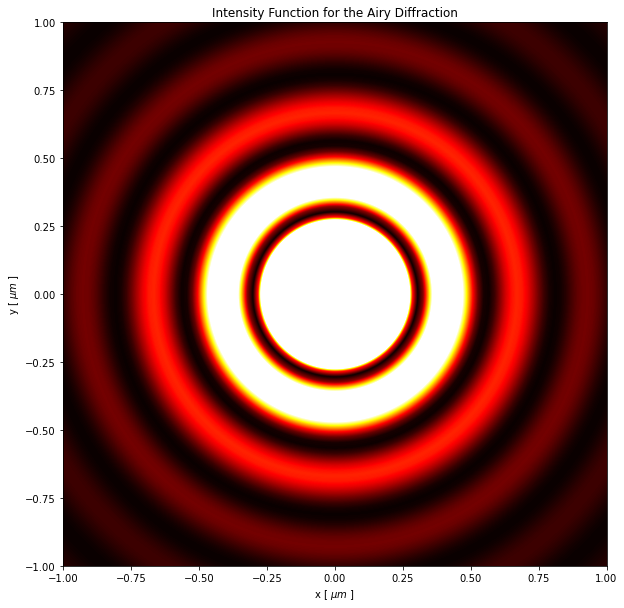

In [3]:
from scipy.interpolate import interp1d

# Interpolate the obtained pattern
intensity_interp = interp1d(rrange, intensity_pattern)

# Create the 2D pattern
N = 1000
xygrid = np.zeros([N,N])
diffraction_pattern = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        xygrid[i,j] = np.sqrt(((i-N/2)/(N/2))**2 + ((j-N/2)/(N/2))**2)

diffraction_pattern = intensity_interp(xygrid)

# Plot of the obtained pattern (2D)
extent = -1,1,-1,1
plt.figure(figsize=(10,10))
plt.imshow(diffraction_pattern, cmap='hot', vmax=0.01, extent=extent)
plt.title('Intensity Function for the Airy Diffraction')
plt.xlabel(r'x [ $\mu m$ ]')
plt.ylabel(r'y [ $\mu m$ ]')
plt.show()

Para localizar los máximos de la función de intensidad calcularemos la derivada de $I(r)$,

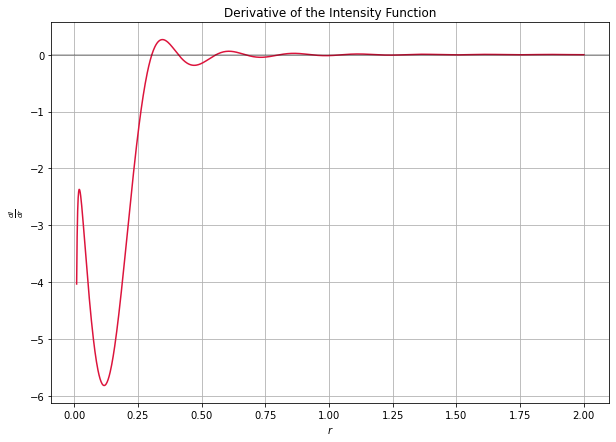

In [56]:
def centeredDerivative(x,f=Intensity, dx=1e-8):
    return (f(x + dx) - f(x - dx))/(2*dx)

rrange = np.linspace(0.01,r_max,1000)
dIdr = np.zeros_like(rrange)

for i in range(len(rrange)):
    dIdr[i] = centeredDerivative(rrange[i])


# Plot the obtained pattern (1D)
plt.figure(figsize=(10,7))
plt.plot(rrange, dIdr, color='crimson')
plt.axhline(0, color='black', alpha=0.3)
plt.grid()
plt.xlabel(r'$r$')
plt.ylabel(r'$\frac{dI}{dr}$')
plt.title('Derivative of the Intensity Function')
plt.show()

y ahora utilizamos el método de la bisección para localizar los ceros de la primera derivada. Es claro que el primer máximo corresponde a $r=0$. Para localizar el intervalo donde se ubica el segundo máximo, hacemos una gráfica de ayuda,

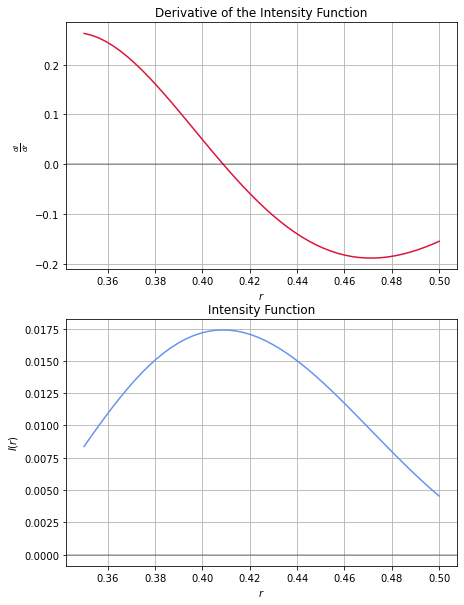

In [53]:
rrange = np.linspace(0.35,0.5,50)
dIdr = np.zeros_like(rrange)
Intens = np.zeros_like(rrange)
for i in range(len(rrange)):
    dIdr[i] = centeredDerivative(rrange[i])
    Intens[i] = Intensity(rrange[i])


fig, ax = plt.subplots(2,1, figsize=(7,10))
ax[0].plot(rrange, dIdr, color='crimson')
ax[0].axhline(0, color='black', alpha=0.3)
ax[0].grid()
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\frac{dI}{dr}$')
ax[0].set_title('Derivative of the Intensity Function')

ax[1].plot(rrange, Intens, color='cornflowerblue')
ax[1].axhline(0, color='black', alpha=0.3)
ax[1].grid()
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$I(r)$')
ax[1].set_title('Intensity Function')

plt.show()

In [41]:
def bisection(f, a, b, epsilon=1e-8):
    '''
    Bisection Method for finding a root
    --------------------------------------------
    Arguments:
    f: Function 
    a,b: Boundaries of the interval to begin the
         search of the root
    epsilon: tolerance for the root
    --------------------------------------------
    Dependeces: NumPy
    --------------------------------------------
    '''
    c = (a + b)/2
    while np.abs(f(c)) > epsilon:
        c = (a + b)/2
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    root = c
    return root, f(root)

x_r, fx_r = bisection(centeredDerivative, 0.4, 0.42)
print(f'La raíz es r = {x_r:.8f}')
print(f'para la cual la derivada de la Intensidad tiene un valor de : {centeredDerivative(x_r):.8e}')
print(f'y la Intensidad tiene un valor de I(r) = {Intensity(x_r):.8e}')

La raíz es r = 0.40872550
para la cual la derivada de la Intensidad tiene un valor de : 7.97972799e-09
y la Intensidad tiene un valor de I(r) = 1.73948948e-02


Para el tercer máximo tenemos:

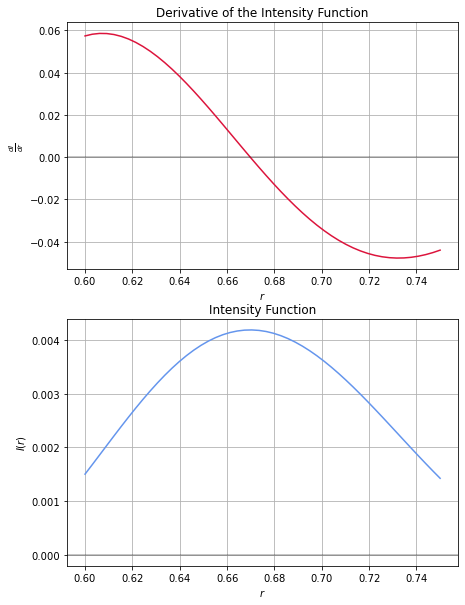

In [54]:
rrange = np.linspace(0.6,0.75,50)
dIdr = np.zeros_like(rrange)
Intens = np.zeros_like(rrange)
for i in range(len(rrange)):
    dIdr[i] = centeredDerivative(rrange[i])
    Intens[i] = Intensity(rrange[i])


fig, ax = plt.subplots(2,1, figsize=(7,10))
ax[0].plot(rrange, dIdr, color='crimson')
ax[0].axhline(0, color='black', alpha=0.3)
ax[0].grid()
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\frac{dI}{dr}$')
ax[0].set_title('Derivative of the Intensity Function')

ax[1].plot(rrange, Intens, color='cornflowerblue')
ax[1].axhline(0, color='black', alpha=0.3)
ax[1].grid()
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$I(r)$')
ax[1].set_title('Intensity Function')

plt.show()

In [40]:
x_r, fx_r = bisection(centeredDerivative, 0.66, 0.68)
print(f'La raíz es r = {x_r:.8f}')
print(f'para la cual la derivada de la Intensidad tiene un valor de : {centeredDerivative(x_r):.8e}')
print(f'y la Intensidad tiene un valor de I(r) = {Intensity(x_r):.8e}')

La raíz es r = 0.66978813
para la cual la derivada de la Intensidad tiene un valor de : -3.07913417e-09
y la Intensidad tiene un valor de I(r) =  4.18872299e-03


Finalmente, el cuarto máximo está localizado en

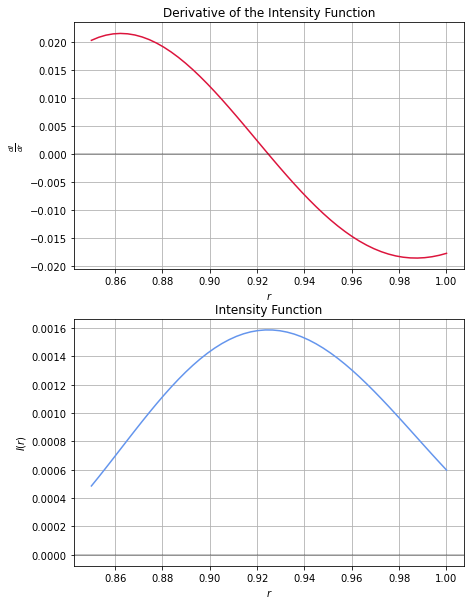

In [55]:
rrange = np.linspace(0.85,1.,50)
dIdr = np.zeros_like(rrange)
Intens = np.zeros_like(rrange)
for i in range(len(rrange)):
    dIdr[i] = centeredDerivative(rrange[i])
    Intens[i] = Intensity(rrange[i])


fig, ax = plt.subplots(2,1, figsize=(7,10))
ax[0].plot(rrange, dIdr, color='crimson')
ax[0].axhline(0, color='black', alpha=0.3)
ax[0].grid()
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\frac{dI}{dr}$')
ax[0].set_title('Derivative of the Intensity Function')

ax[1].plot(rrange, Intens, color='cornflowerblue')
ax[1].axhline(0, color='black', alpha=0.3)
ax[1].grid()
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$I(r)$')
ax[1].set_title('Intensity Function')

plt.show()

In [45]:
x_r, fx_r = bisection(centeredDerivative, 0.92, 0.94)
print(f'La raíz es r = {x_r:.8f}')
print(f'para la cual la derivada de la Intensidad tiene un valor de : {centeredDerivative(x_r):.8e}')
print(f'y la Intensidad tiene un valor de I(r) = {Intensity(x_r):.8e}')

La raíz es r = 0.92470707
para la cual la derivada de la Intensidad tiene un valor de : 4.55364912e-09
y la Intensidad tiene un valor de I(r) = 1.58688509e-03


En resumen, los máximos encontrados son:

| $r$ | $I$ | $\frac{dI}{dr}$ |
| :---: | :----: | :---: |
| 0.0| 1.0 | 0.0 |
| 0.40872550| 1.73948948e-02 | 7.97972799e-09 |
| 0.66978813| 4.18872299e-03 | -3.07913417e-09 |
| 0.92470707| 1.58688509e-03 | 4.55364912e-09 |